In [1]:
# importing libraries 
import cv2 
import numpy as np 

#SET FRAME INTERVAL
frame_interval = 5

#SET VIDEO FILE NAME
video_in = 'Matchstick.mp4'

# Create a VideoCapture object and read from input file 
cap = cv2.VideoCapture(video_in) 

# Check if camera opened successfully 
if (cap.isOpened()== False): 
    print("Error opening video file") 



count = 0
images_list = []

# Read until video is completed 
while(cap.isOpened()):
	
    # Capture frame-by-frame 
    ret, frame = cap.read() 
    if ret == True: 

        # Display the resulting frame 
        cv2.imshow('Frame', frame)
        count = count + 1
        
        #Saving Images
        if count % frame_interval == 0:
            images_list.append(frame)

        # Press Q on keyboard to exit 
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    # Break the loop 
    else: 
        break

# When everything is done, release 
# the video capture object 
cap.release() 

# Closes all the frames 
cv2.destroyAllWindows()

# Prints the number of frames saved
print(count)

3042


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


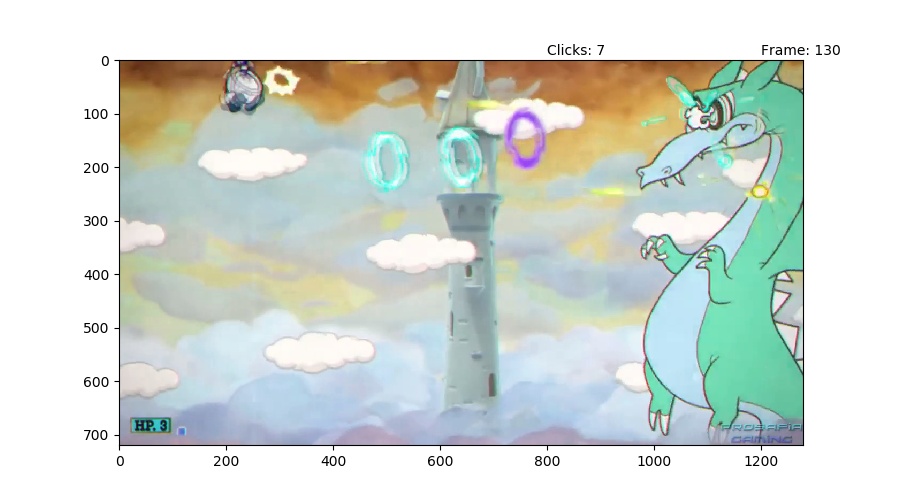

Text(value='', description='Go to Frame:', placeholder='enter frame number')

Text(value='', description='Name Data:', placeholder='measurement name')

In [3]:
fig = plt.figure(figsize=(9,5))
history = []

# Manage Clicks
click_count = 0
display_clicks = plt.text(800,-10,'Clicks: 0')
def onclick(event):
    global click_count
    history.append(np.array((int(event.xdata), int(event.ydata))))
    click_count = click_count + 1
    txt = 'Clicks: ' + str(click_count)
    display_clicks.set_text(txt)
    
# Manage Frame Switch
current_frame = 0
display_current_frame = plt.text(1200,-10,'Frame: 0')
def frameswitch(event):
    global current_frame
    global display_current_frame
    if(event.key == 'right'):
        current_frame = current_frame + 1
    elif event.key == 'left':
        current_frame = current_frame - 1
    else:
        current_frame = current_frame
    txt = 'Frame: ' + str(current_frame * frame_interval)
    display_current_frame.set_text(txt)
    plt.imshow(images_list[current_frame])

cid = fig.canvas.mpl_connect('button_press_event', onclick)
cid = fig.canvas.mpl_connect('key_press_event', frameswitch)
plt.imshow(images_list[0])
plt.show()

#create brief names for labeling when taking multiple measurements
measurement_names = []

from ipywidgets import interact, widgets
from IPython.display import display

# Type-in Frame number
frameentry = widgets.Text(
    value='',
    placeholder='enter frame number',
    description='Go to Frame:',
    disabled=False
)
display(frameentry)

def callback1(wdgt):
    global current_frame
    current_frame = int(int(frameentry.value) / frame_interval)
    plt.imshow(images_list[current_frame])
    txt = 'Frame: ' + str(current_frame * frame_interval)
    display_current_frame.set_text(txt)
    text.value = text.placeholder
frameentry.on_submit(callback1)

# Type in datapoint name
text = widgets.Text(
    value='',
    placeholder='measurement name',
    description='Name Data:',
    disabled=False
)
display(text)

def callback(wdgt):
    display(wdgt.value)
    measurement_names.append(wdgt.value)
    text.value = ''
text.on_submit(callback)

In [4]:
import math

#initialize export lists
points_tuple_list = ['Coordinates']
width_l = ['Width']
height_l = ['Height']
distance_l = ['Distance']
area_l = ['Area']
percent_of_screen_l = ['% of Screen']


#constants for clarity
x = 0
y = 1

print(history)

#calculate and print extracted values
for i in range(0, len(history)-1, 2):
    #calculate values
    width = round( abs(history[i][x]-history[i+1][x]) )
    height = round( abs(history[i][y]-history[i+1][y]) )
    distance = round( math.sqrt(width**2 + height**2) )
    area = round( width * height )
    percent_of_screen = round( (area/(1280*720))*100 , 2 )
    #local print data to screen
    print()
    print('---')
    print( "(" +str(history[i][x])+ "," +str(history[i][y])+ ")" + 
          " " + "(" +str(history[i+1][x])+ "," +str(history[i+1][y])+ ")" )
    print('W: ',width)
    print('H: ',height)
    print('D: ',distance)
    print('Area:      ',area)
    print('%ofScreen: ',str(percent_of_screen) + '%')
    #save data to lists for export
    points_tuple_list.append( "(" +str(history[i][x])+ "," +str(history[i][y])+ ")" + 
          " " + "(" +str(history[i+1][x])+ "," +str(history[i+1][y])+ ")" )
    width_l.append(width)
    height_l.append(height)
    distance_l.append(distance)
    area_l.append(area)
    percent_of_screen_l.append(percent_of_screen)

[]


In [5]:
#Format output data
final = []

measurement_names.insert(0,' ')
final.append(measurement_names)
final.append(points_tuple_list)
final.append(width_l)
final.append(height_l)
final.append(distance_l)
final.append(area_l)
final.append(percent_of_screen_l)
    
print(final)

[[' '], ['Coordinates'], ['Width'], ['Height'], ['Distance'], ['Area'], ['% of Screen']]


In [6]:
#Save data from 'history' to file
import csv

csvfile = 'Dump4-23-2.csv'

try:
    with open(csvfile) as file:
        print("File Already Exists. Do not Overwrite.")
        
except IOError as e:
    #Assuming res is a list of lists
    with open(csvfile, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(final)
    print("Data saved successfully to: ",csvfile)

# print(history)

#Assuming res is a flat list
# with open(csvfile, "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for val in final:
#         writer.writerow([val])    


File Already Exists. Do not Overwrite.
